In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [2]:
project_path = f'C:\\Users\\Nassila\\Documents\\Projects\\Multiple_sclerosis\\Dual_task\\Raw_data\\Sensor_data\\'
conf = pd.read_csv('C:\\Users\\Nassila\\Documents\\Projects\\Multiple_sclerosis\\Dual_task\\Raw_data\\conf_filt.csv', sep='\t').drop('Unnamed: 0', axis=1)
# conf.columns
conf_S1 = conf[conf.Session == 1].reset_index(drop=True)
conf_S1.head(2)

#First is simple_and second is dual

ID Group   Date_gait                  File_NG                  File_DT  \
0   2    MS  2022-01-13  20220113-100613_Walk.h5  20220113-100730_Walk.h5   
1   3    MS  2022-03-30  20220330-143534_Walk.h5  20220330-143622_Walk.h5   

   Session EDSS MS_type             Date_PST  Total_number_correct  \
0        1    4    RRMS  2022-01-13 09:42:27                  44.0   
1        1  3,5    RRMS  2022-03-30 14:37:51                  67.0   

   Total_number_incorrect   Z_score  
0                     1.0  0.046879  
1                     0.0  1.656856

In [3]:
conf[conf.ID==1995]

ID Group   Date_gait                  File_NG  \
2614  1995    MS  2022-12-05  20221205-093119_Walk.h5   
2615  1995    MS  2023-06-06  20230606-101146_Walk.h5   

                      File_DT  Session EDSS MS_type             Date_PST  \
2614  20221205-093218_Walk.h5        1    3    RRMS  2022-12-12 11:17:03   
2615  20230606-101238_Walk.h5        2    3    RRMS  2023-06-13 12:20:21   

      Total_number_correct  Total_number_incorrect   Z_score  
2614                  62.0                     0.0  0.841652  
2615                  55.0                     1.0  0.098334

In [45]:
conf[conf.Z_score.isna()]

ID Group   Date_gait                  File_NG  \
97        57    MS  2022-05-06  20220506-085808_Walk.h5   
98        57    MS  2023-05-02  20230502-085807_Walk.h5   
132       75    MS  2023-04-19  20230419-100757_Walk.h5   
151       87    MS  2022-01-13  20220113-135722_Walk.h5   
152       87    MS  2023-01-12  20230112-123831_Walk.h5   
...      ...   ...         ...                      ...   
3029  100044    HC  2021-06-28  20210628-121029_Walk.h5   
3030  100048    HC  2021-07-21  20210721-153322_Walk.h5   
3031  100055    HC  2021-07-21  20210721-142458_Walk.h5   
3032  100056    HC  2021-09-15  20210915-160917_Walk.h5   
3033  100098    HC  2022-01-03  20220103-104532_Walk.h5   

                      File_DT  Session EDSS MS_type             Date_PST  \
97    20220506-085928_Walk.h5        1  1,5    RRMS  2022-05-10 12:57:26   
98    20230502-085914_Walk.h5        2  1,5    RRMS  2023-05-09 12:08:57   
132   20230419-100912_Walk.h5        1  2,5    RRMS  2023-04-26 13:35:20   
151   20220113-135813_Walk.h5        1  2,5    RRMS  2022-01-13 15:52:17   
152   20230112-124027_Walk.h5        2  2,5    RRMS  2023-01-12 12:56:46   
...                       ...      ...  ...     ...                  ...   
3029  20210628-121158_Walk.h5        1  NaN     NaN                  NaN   
3030  20210721-153501_Walk.h5        1  NaN     NaN                  NaN   
3031  20210721-142637_Walk.h5        1  NaN     NaN                  NaN   
3032  20210915-161042_Walk.h5        1  NaN     NaN                  NaN   
3033  20220103-104652_Walk.h5        1  NaN     NaN                  NaN   

      Total_number_correct  Total_number_incorrect  Z_score  
97                    68.0                     1.0      NaN  
98                    69.0                     1.0      NaN  
132                   55.0                     0.0      NaN  
151                   30.0                     2.0      NaN  
152                   27.0                     0.0      NaN  
...                    ...                     ...      ...  
3029                   NaN                     NaN      NaN  
3030                   NaN                     NaN      NaN  
3031                   NaN                     NaN      NaN  
3032                   NaN                     NaN      NaN  
3033                   NaN                     NaN      NaN  

[285 rows x 12 columns]

# Temporal parameters

In [63]:
Temporal_data = [ifile for ifile in (Path(project_path+'Temporal_data')).glob("*.npy") if ifile.stem.startswith('Temporal')]
df_Temporal = pd.DataFrame(columns = ['Trial', 'stride id', 'Foot', 'stride time [s]', 'swing time [s]', 'stance time [s]', 'Z_score'])
dropped_participants = 0
for index, row in conf_S1.iterrows():
    Z_sc = row.Z_score

    pref_file_name = 'P'+str(row.ID)+'_E'+str(row.EDSS)+'_S'+str(row.Session)
    part_files = []
    for itype_gait in ['File_NG', 'File_DT']:
        gait_name = pref_file_name+itype_gait[-3:]+'_'+row[itype_gait][:-3]+'.npy'
        if os.path.exists(project_path+'Temporal_data\\Temporal_' + gait_name):
            part_files.append(project_path+'Temporal_data\\Temporal_' + gait_name)
            

    if len(part_files)==2:
        # Check if both files exist:
        # P1000100_Enan_S1_DT_20210730-081303_Walk
        for ifile in part_files:
            ifile = Path(ifile)
            gait_name = ifile.stem[9:]
            # print(gait_name)
            # print(toto)
            # h5name = '_'.join(ifile.stem.split('_')[-2:])+'.h5'
            # isindata = conf[conf.isin([h5name])].stack().index[0]
            # print(isindata)
            # print(toto)
            read_dictionary = np.load(ifile,allow_pickle='TRUE').item()
            roi_dictionary = np.load(project_path+f'Stride_detection\\StrideBound_{ifile.stem[9:]}.npy',allow_pickle='TRUE').item()
            # print(roi_dictionary['Left Foot'])
            # print(toto)
            left = read_dictionary['Left Foot'].reset_index().assign(Foot='Left').assign(Trial=ifile.stem)
            left['gs_id'] = [roi_dictionary['Left Foot'].loc[i].gs_id for i in left['stride id']]
            left['Z_score'] = [Z_sc]*left.shape[0]
            

            right = read_dictionary['Right Foot'].reset_index().assign(Foot='Right').assign(Trial=ifile.stem)
            right['gs_id'] = [roi_dictionary['Right Foot'].loc[i].gs_id for i in right['stride id']]
            right['Z_score'] = [Z_sc]*right.shape[0]

            df_Temporal = pd.concat([df_Temporal, left], ignore_index=True)
            df_Temporal = pd.concat([df_Temporal, right], ignore_index=True)
            

    else:
         if int(row.ID) not in [16, 49, 82, 148, 164, 168, 213, 217, 249, 271, 356, 364, 372, 373, 377, 382, 384, 422, 444, 458, 463, 555, 556,567, 578, 592,
                                650, 652, 664, 670, 691, 721, 738, 864, 892, 917, 925, 929, 930, 958, 976, 1005, 1078, 1146,1213,1229,
                                1233,1255,1266,1301,1360, 1450, 1495, 1554,1600, 1601,1605,1673, 1801, 1995,
                                2045,2073,2076,2078,2095, 2118,2241,2258,2339,2344,1000122,1000173,392]:
            dropped_participants+=1
            if row.EDSS not in ['6', '6,5']:
                print(f'{row.ID}')
                      # Participant
                      
               # , EDSS {row.EDSS} has only {len(part_files)} files for the first session, Please check or drop for following analysis'
                     # ')

print(f'In total, {dropped_participants} participant dropped') 
print(f'Z score Nans {df_Temporal.Z_score.isna().sum()}/{df_Temporal.shape[0]}')
df_Temporal['Participant'] = df_Temporal['Trial'].str.split('_').str[1].str[1:]# [int(i.split('_')[1][1:]) for i in df_Temporal.Trial]
# df_Temporal['Group'] = [conf[conf.ID==i].Group.values[0] for i in df_Temporal.Participant]
df_Temporal['EDSS'] = df_Temporal['Trial'].str.split('_').str[2].str[1:].str.replace(',', '.').astype(float)#[float(i.split('_')[2].replace(',', '.')[1:]) for i in df_Temporal.Trial]
df_Temporal['Session'] = df_Temporal['Trial'].str.split('_').str[3].str[1:].astype(int) #[int(i.split('_')[3][1:]) for i in df_Temporal.Trial]
df_Temporal['Task'] = df_Temporal['Trial'].str.split('_').str[4] #[i.split('_')[4] for i in df_Temporal.Trial] 
df_Temporal['Task'] = df_Temporal.Task+df_Temporal.gs_id.astype(str)
task_coding = {'NG1.0':"Normal Gait", 'NG0.0':"Normal Gait", 'DT0.0':"Substraction", 'DT1.0':"World Fluency"}
df_Temporal.replace({'Task':task_coding}, inplace=True)

for iparticipant in conf[conf.Group=='HC'].ID.values:
    df_Temporal.loc[df_Temporal.Participant == str(iparticipant), 'EDSS'] = "HC"


df_Temporal[['EDSS','Participant']].drop_duplicates().groupby('EDSS').count()

95
201
252
648
870
1180
1324
1550
1630
1982
2120
2263
In total, 73 participant dropped
Z score Nans 8522/63878


Participant
EDSS             
0.0            11
1.0            72
1.5           349
2.0           238
2.5           160
3.0           139
3.5           116
4.0           152
4.5            40
5.0            15
5.5            22
6.0            74
6.5            28
HC            160

In [37]:
df_Temporal.head()

Trial stride id  Foot  stride time [s]  \
0  Temporal_P2_E4_S1_NG_20220113-100613_Walk         0  Left         1.250000   
1  Temporal_P2_E4_S1_NG_20220113-100613_Walk         1  Left         1.164062   
2  Temporal_P2_E4_S1_NG_20220113-100613_Walk         2  Left         1.320312   
3  Temporal_P2_E4_S1_NG_20220113-100613_Walk         3  Left         1.195312   
4  Temporal_P2_E4_S1_NG_20220113-100613_Walk         4  Left         1.187500   

   swing time [s]  stance time [s]  Z_score  gs_id Participant EDSS  Session  \
0        0.445312         0.804688      NaN    0.0           2  4.0        1   
1        0.445312         0.718750      NaN    0.0           2  4.0        1   
2        0.484375         0.835938      NaN    0.0           2  4.0        1   
3        0.484375         0.710938      NaN    0.0           2  4.0        1   
4        0.453125         0.734375      NaN    0.0           2  4.0        1   

          Task  
0  Normal Gait  
1  Normal Gait  
2  Normal Gait  
3  Normal Gait  
4  Normal Gait

<Axes: xlabel='EDSS', ylabel='Participant'>

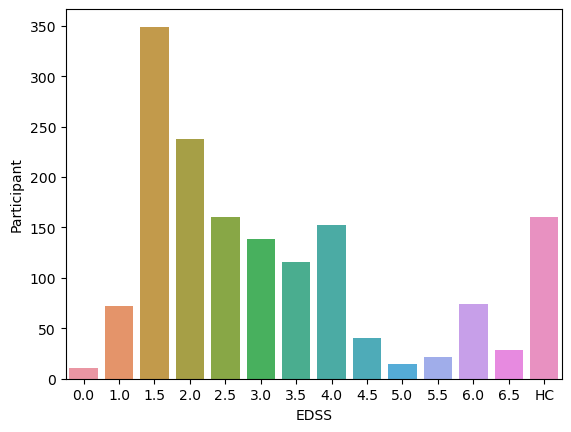

In [5]:
sns.barplot(data=
            df_Temporal[['EDSS','Participant']].drop_duplicates().groupby('EDSS').count().reset_index(), x='EDSS', y= 'Participant')

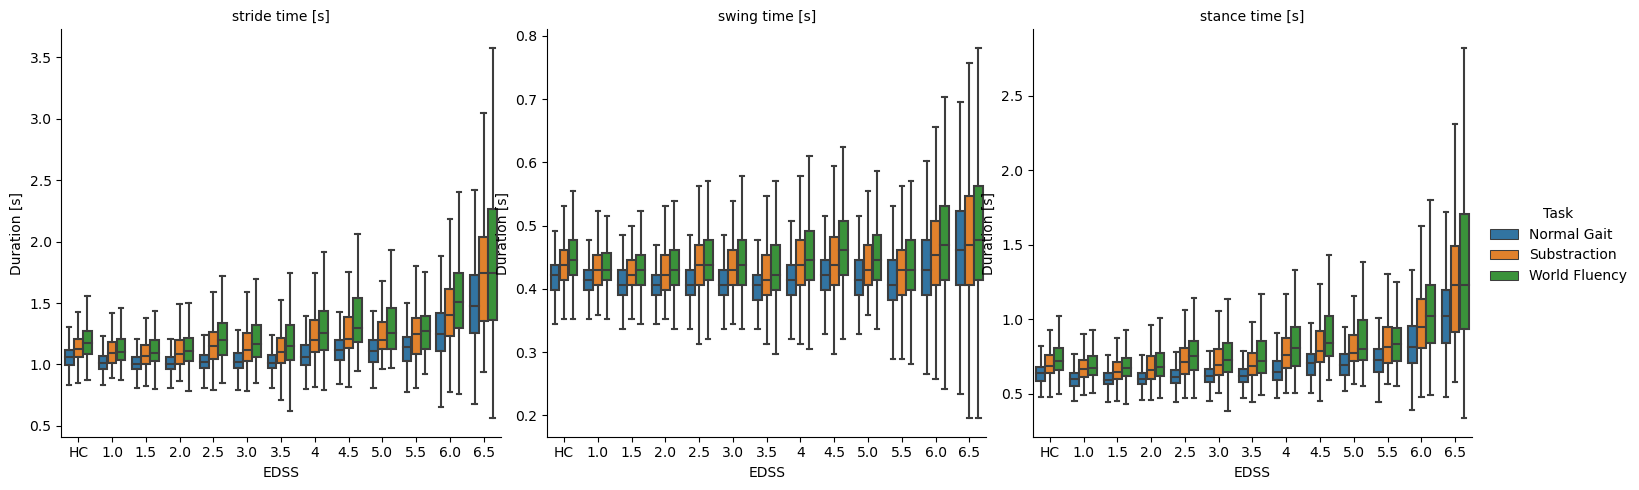

In [32]:
g = sns.catplot(data=df_Temporal.melt(['Foot', 'stride id', 'Trial', 'Participant', 'Task', 'EDSS', 'gs_id', 'Session', 'Z_score']), 
                x="EDSS", y="value", hue="Task", kind="box", col='variable',# row='Foot',
                dodge=True,
                # orient='v',
                sharey=False, 
                showfliers=False,
                order=['HC',1.0,1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5.0, 5.5, 6.0, 6.5],
                # margin_titles=True,height=4, aspect=1.5,
               )
g.set(ylabel="Duration [s]")
g.set_titles(col_template= "{col_name}")
# for i, iax in enumerate(g.axes.flatten()):
#     reg_data = df_Temporal.melt(['Foot', 'stride id', 'Trial', 'Participant', 'Task', 'EDSS'])
#     sns.regplot(
#         data= reg_data[reg_data.variable==iax.get_title()], x="EDSS", y="value",
#         scatter=False, truncate=False, color=".2", ax=iax,
#         robust=True,
#         # lowess=True,
#         # order=2,
# )

In [64]:
df_Temporal_norm = df_Temporal.copy(deep=True)
df_Temporal_norm['swing_portion'] = df_Temporal_norm['swing time [s]']/ df_Temporal_norm['stride time [s]']*100
df_Temporal_norm['stance_portion'] = df_Temporal_norm['stance time [s]']/ df_Temporal_norm['stride time [s]']*100
# g = sns.catplot(data=df_Temporal_norm.drop(['stride time [s]', 'swing time [s]', 'stance time [s]'], axis=1 ).melt(['Foot', 'stride id', 'Trial', 'Participant','Task', 'EDSS', 'gs_id', 'Session', 'Z_score']),
#                 x="EDSS", y="value", hue="Task", kind="violin", 
#                 row='variable', sharey=False, #row='Foot', 
#                 order=['HC',1.0,1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5.0, 5.5, 6.0, 6.5],
#                 # split=True, 
#                 dodge=True,
#                 margin_titles=True,height=2, aspect=3,)
# g.set(ylabel="Duration [%]")
# g.set_titles(col_template= "{col_name}")
# for i, iax in enumerate(g.axes.flatten()):
# #     reg_data = df_Temporal_norm.drop(['stride time [s]', 'swing time [s]', 'stance time [s]'], axis=1 ).melt(['Foot', 'stride id', 'Trial','Participant', 'Task', 'EDSS', 'Date', 'Time'])
# #     sns.regplot(
# #         data= reg_data[(reg_data.variable==iax.get_title()) & (reg_data.Task=='Single')], x="EDSS", y="value",
# #         scatter=False, truncate=False, color="#ff7f0e", ax=iax,
# #         robust=True, 
# #         # lowess=True,
# #         # order=2,
# #     )
# #     sns.regplot(
# #         data= reg_data[(reg_data.variable==iax.get_title()) & (reg_data.Task=='Dual')], x="EDSS", y="value",
# #         scatter=False, truncate=False, color="#1f77b4", ax=iax,
# #         robust=True, 
# #         # lowess=True,
# #         # order=2,
# # )
#     if i in [0, 2]:
#         iax.set(ylabel="Duration [% of stride time]")
#     else:
#         iax.set(ylabel="")



In [76]:
# g = sns.FacetGrid(data=df_Temporal_norm.drop(['swing time [s]', 'stance time [s]', "stance_portion"], axis=1 ).melt([ #'stride time [s]', 
#     'Foot', 'stride id', 'Trial', 'Participant','Task', 'EDSS', 'gs_id', 'Session']),
#                   row="EDSS", col='variable', hue="Task", 
#                   row_order =['HC',1.0,1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5.0, 5.5, 6.0, 6.5],
#                   aspect=5, height=.9,
#                   sharex="col", sharey="col",
                  
#                   )
df_test = df_Temporal_norm.drop(['swing time [s]', 'stance time [s]', "stance_portion", 'swing_portion'], axis=1 ).melt([ #'stride time [s]', 
    'Foot', 'stride id', 'Trial', 'Participant','Task', 'EDSS', 'gs_id', 'Session', 'Z_score'])

df_Temporal_norm.head()
# sns.kdeplot(data=df_test[df_test.EDSS==1], x="value", y="Z_score", hue='Task', fill=True, alpha=0.3)
# sns.kdeplot()
# Draw the densities in a few steps
# g.map(sns.kdeplot, x="value", y='Z_score',
      # bw_adjust=.4, clip_on=[0, 90], 
      # fill=True, alpha=0.3, linewidth=1.5)

Trial stride id  Foot  stride time [s]  \
0  Temporal_P2_E4_S1_NG_20220113-100613_Walk         0  Left         1.250000   
1  Temporal_P2_E4_S1_NG_20220113-100613_Walk         1  Left         1.164062   
2  Temporal_P2_E4_S1_NG_20220113-100613_Walk         2  Left         1.320312   
3  Temporal_P2_E4_S1_NG_20220113-100613_Walk         3  Left         1.195312   
4  Temporal_P2_E4_S1_NG_20220113-100613_Walk         4  Left         1.187500   

   swing time [s]  stance time [s]   Z_score  gs_id Participant EDSS  Session  \
0        0.445312         0.804688  0.046879    0.0           2  4.0        1   
1        0.445312         0.718750  0.046879    0.0           2  4.0        1   
2        0.484375         0.835938  0.046879    0.0           2  4.0        1   
3        0.484375         0.710938  0.046879    0.0           2  4.0        1   
4        0.453125         0.734375  0.046879    0.0           2  4.0        1   

          Task  swing_portion  stance_portion  
0  Normal Gait      35.625000       64.375000  
1  Normal Gait      38.255034       61.744966  
2  Normal Gait      36.686391       63.313609  
3  Normal Gait      40.522876       59.477124  
4  Normal Gait      38.157895       61.842105

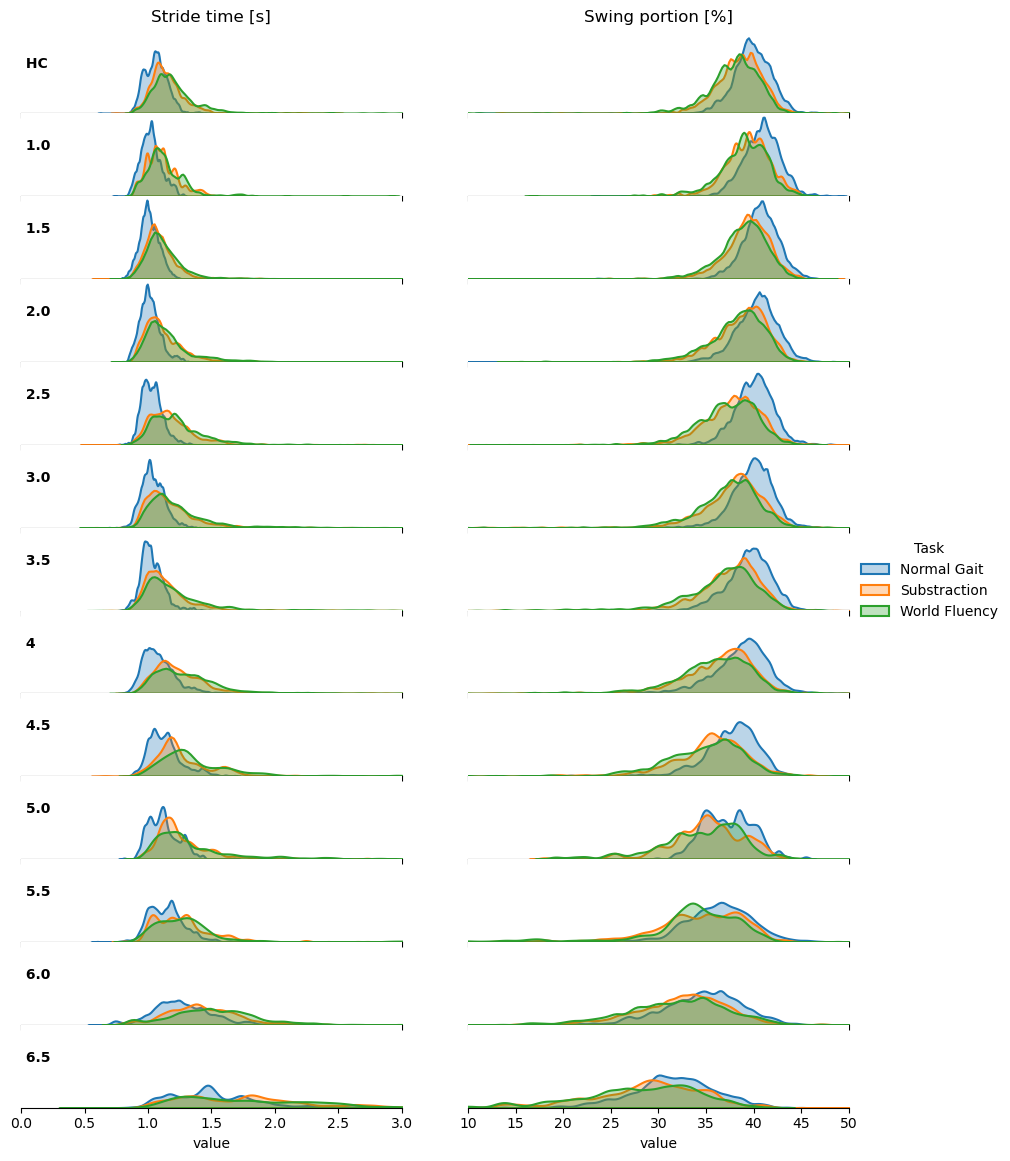

In [8]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=df_Temporal_norm.drop(['swing time [s]', 'stance time [s]', "stance_portion"], axis=1 ).melt([ #'stride time [s]', 
    'Foot', 'stride id', 'Trial', 'Participant','Task', 'EDSS', 'gs_id', 'Session']),
                  row="EDSS", col='variable', hue="Task", 
                  row_order =['HC',1.0,1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5.0, 5.5, 6.0, 6.5],
                  aspect=5, height=.9,
                  sharex="col", sharey="col",
                  
                  )
# sns.kdeplot()
# Draw the densities in a few steps
g.map(sns.kdeplot, "value",
      bw_adjust=.4, clip_on=[0, 90], 
      fill=True, alpha=0.3, linewidth=1.5)
# g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=1, linestyle="-", color='k', clip_on=False)


for i, iax in enumerate(g.axes):
    ax_text = iax[0].get_title().split('|')[0].split('=')[-1]
    iax[0].text(0, .6, ax_text, fontweight="bold",
            ha="left", va="center", transform=iax[0].transAxes)
    iax[0].set_xlim([0,3])
    iax[1].set_xlim([10,50])
    # iax[2].set_xlim([50, 90])
    if i!= len(g.axes)-1:
        iax[0].spines['bottom'].set_visible(False)
        iax[1].spines['bottom'].set_visible(False)
        # iax[2].spines['bottom'].set_visible(False)

# # Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.001)

# # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(left=True)
g.axes[0, 0].set_title('Stride time [s]')
g.axes[0, 1].set_title('Swing portion [%]')
# g.axes[0, 2].set_title('Stance portion[%]')
g.add_legend()


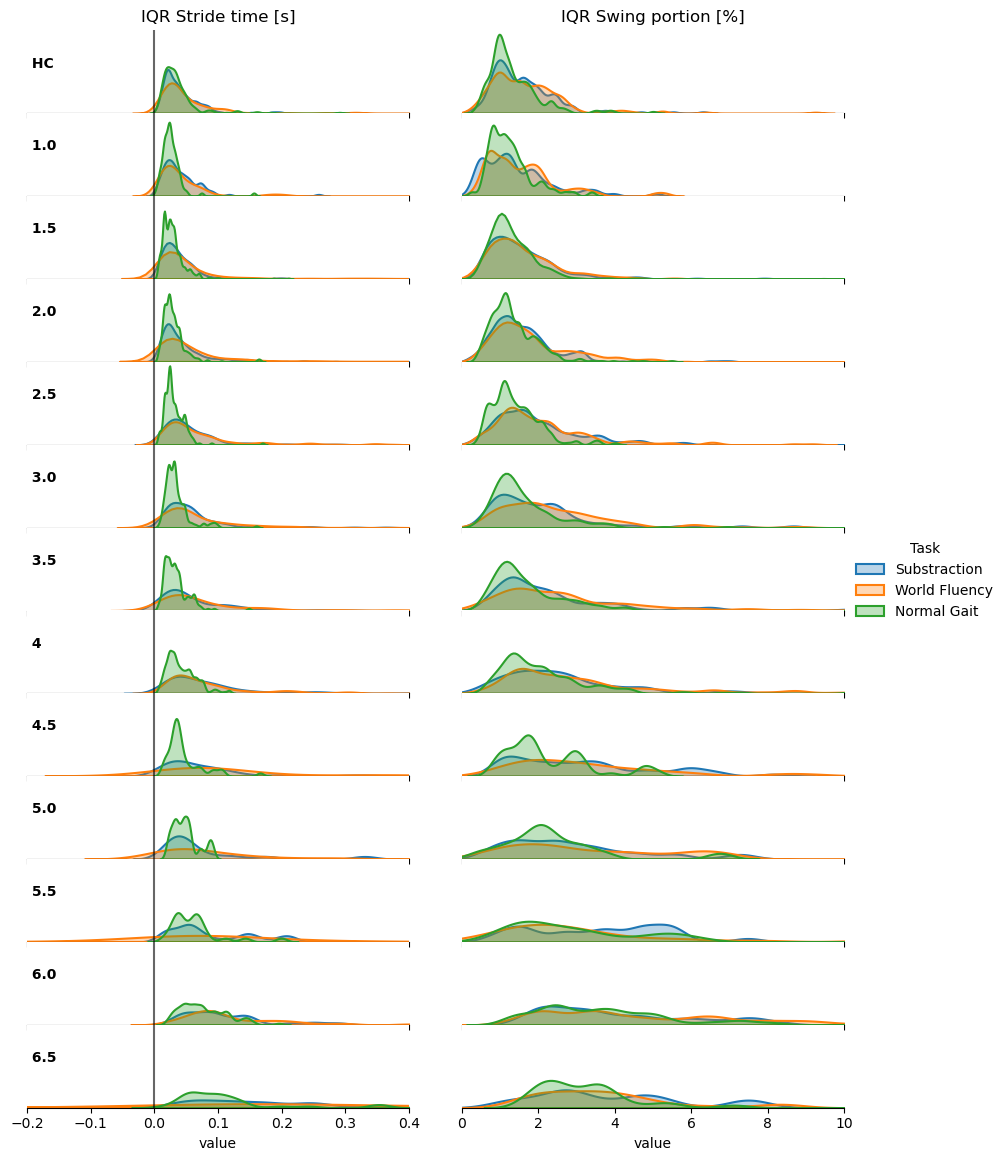

In [9]:
from scipy.stats import iqr

df_Temporal_iqr = pd.concat([df_Temporal_norm.groupby(['Trial','Participant', 'Task', 'EDSS'])[x].agg(iqr).to_frame().reset_index(['Participant', 'Task', 'EDSS']) 
           for x in ['stride time [s]', 'swing_portion' ]], axis=1).reset_index()
df_Temporal_iqr = df_Temporal_iqr.loc[:,~df_Temporal_iqr.columns.duplicated()]
df_Temporal_iqr.head()
g = sns.FacetGrid(data=df_Temporal_iqr.melt([ #'stride time [s]', 
     'Trial', 'Participant','Task', 'EDSS', ]),
                  row="EDSS", col='variable', hue="Task", 
                  row_order =['HC',1.0,1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5.0, 5.5, 6.0, 6.5],
                  aspect=5, height=.9,
                  sharex="col", sharey="col",
                  
                  )
sns.kdeplot()
# Draw the densities in a few steps
g.map(sns.kdeplot, "value",
      bw_adjust=.4, clip_on=[0, 90], 
      fill=True, alpha=0.3, linewidth=1.5)
# g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=1, linestyle="-", color='k', clip_on=False)


for i, iax in enumerate(g.axes):
    ax_text = iax[0].get_title().split('|')[0].split('=')[-1]
    iax[0].text(0, .6, ax_text, fontweight="bold",
            ha="left", va="center", transform=iax[0].transAxes)
    iax[0].set_xlim([-0.2,0.4])
    iax[1].set_xlim([0,10])
    iax[0].axvline(0, c='k', alpha=0.6)
    # iax[2].set_xlim([50, 90])
    if i!= len(g.axes)-1:
        iax[0].spines['bottom'].set_visible(False)
        iax[1].spines['bottom'].set_visible(False)
        # iax[2].spines['bottom'].set_visible(False)

# # Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.001)

# # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(left=True)
g.axes[0, 0].set_title('IQR Stride time [s]')
g.axes[0, 1].set_title('IQR Swing portion [%]')
# # g.axes[0, 2].set_title('Stance portion[%]')
g.add_legend()

# Spatial parameters

In [10]:
Spatial_data = [ifile for ifile in (Path(project_path+'Spatial_data')).glob("*.npy") if ifile.stem.startswith('Spatial')]
df_Spatial = pd.DataFrame(columns = ['Trial', 'stride id', 'Foot', 
                                     'arc length [m]', 'gait velocity [m/s]', 'ic angle [deg]',
                                     'max. lateral excursion [m]', 'max. sensor lift [m]',
                                     'stride length [m]', 'tc angle [deg]', 'turning angle [deg]'])
# for ifile in Spatial_data:
#     read_dictionary = np.load(ifile,allow_pickle='TRUE').item()
#     left = read_dictionary['Left Foot'].reset_index().assign(Foot='Left').assign(Trial=ifile.stem)
#     right = read_dictionary['Right Foot'].reset_index().assign(Foot='Right').assign(Trial=ifile.stem)
    
#     df_Spatial = pd.concat([df_Spatial, left], ignore_index=True)
#     df_Spatial = pd.concat([df_Spatial, right], ignore_index=True)

dropped_participants = 0
for index, row in conf_S1.iterrows():
    pref_file_name = 'P'+str(row.ID)+'_E'+str(row.EDSS)+'_S'+str(row.Session)
    part_files = []
    for itype_gait in ['File_NG', 'File_DT']:
        gait_name = pref_file_name+itype_gait[-3:]+'_'+row[itype_gait][:-3]+'.npy'
        if os.path.exists(project_path+'Spatial_data\\Spatial_' + gait_name):
            part_files.append(project_path+'Spatial_data\\Spatial_' + gait_name)
            

    if len(part_files)==2:
        # Check if both files exist:
        # P1000100_Enan_S1_DT_20210730-081303_Walk
        for ifile in part_files:
            ifile = Path(ifile)
            gait_name = ifile.stem[8:]
            # print(gait_name)
            # print(toto)
            # h5name = '_'.join(ifile.stem.split('_')[-2:])+'.h5'
            # isindata = conf[conf.isin([h5name])].stack().index[0]
            # print(isindata)
            # print(toto)
            read_dictionary = np.load(ifile,allow_pickle='TRUE').item()
            roi_dictionary = np.load(project_path+f'Stride_detection\\StrideBound_{ifile.stem[8:]}.npy',allow_pickle='TRUE').item()
            # print(roi_dictionary['Left Foot'])
            # print(toto)
            left = read_dictionary['Left Foot'].reset_index().assign(Foot='Left').assign(Trial=ifile.stem)
            left['gs_id'] = [roi_dictionary['Left Foot'].loc[i].gs_id for i in left['stride id']]

            right = read_dictionary['Right Foot'].reset_index().assign(Foot='Right').assign(Trial=ifile.stem)
            right['gs_id'] = [roi_dictionary['Right Foot'].loc[i].gs_id for i in right['stride id']]

            df_Spatial = pd.concat([df_Spatial, left], ignore_index=True)
            df_Spatial = pd.concat([df_Spatial, right], ignore_index=True)
    else:
         if int(row.ID) not in [16, 49, 82, 148, 164, 168, 213, 217, 249, 271, 356, 364, 372, 373, 377, 382, 384, 422, 444, 458, 463, 555, 556,567, 578, 592,
                                650, 652, 664, 670, 691, 721, 738, 864, 892, 917, 925, 929, 930, 958, 976, 1005, 1078, 1146,1213,1229,
                                1233,1255,1266,1301,1360, 1450, 1495, 1554,1600, 1601,1605,1673, 1801, 1995,
                                2045,2073,2076,2078,2095, 2118,2241,2258,2339,2344,1000122,1000173,392]:
            dropped_participants+=1
            if row.EDSS not in ['6', '6,5']:
                print(f'{row.ID}')
                      # Participant
                      
               # , EDSS {row.EDSS} has only {len(part_files)} files for the first session, Please check or drop for following analysis'
                     # ')
                                  
    
print(f'In total, {dropped_participants} participant dropped') 
df_Spatial.rename(columns={'ic angle [deg]': 'heel strike angle [deg]',
                           'tc angle [deg]': 'toe off angle [deg]'}, inplace=True)   

df_Spatial['Participant'] = df_Spatial['Trial'].str.split('_').str[1].str[1:]# [int(i.split('_')[1][1:]) for i in df_Temporal.Trial]
df_Spatial['EDSS'] = df_Spatial['Trial'].str.split('_').str[2].str[1:].str.replace(',', '.').astype(float)#[float(i.split('_')[2].replace(',', '.')[1:]) for i in df_Temporal.Trial]
df_Spatial['Session'] = df_Spatial['Trial'].str.split('_').str[3].str[1:].astype(int) #[int(i.split('_')[3][1:]) for i in df_Temporal.Trial]
df_Spatial['Task'] = df_Spatial['Trial'].str.split('_').str[4] #[i.split('_')[4] for i in df_Temporal.Trial] 
df_Spatial['Task'] = df_Spatial.Task+df_Spatial.gs_id.astype(str)
task_coding = {'NG1.0':"Normal Gait", 'NG0.0':"Normal Gait", 'DT0.0':"Substraction", 'DT1.0':"World Fluency"}
df_Spatial.replace({'Task':task_coding}, inplace=True)

for iparticipant in conf[conf.Group=='HC'].ID.values:
    df_Spatial.loc[df_Spatial.Participant == str(iparticipant), 'EDSS'] = "HC"


df_Spatial.head(1)

95
201
252
648
870
1180
1324
1550
1630
1982
2120
2263
In total, 73 participant dropped


Trial stride id  Foot  arc length [m]  \
0  Spatial_P2_E4_S1_NG_20220113-100613_Walk         0  Left         1.11414   

   gait velocity [m/s]  heel strike angle [deg]  max. lateral excursion [m]  \
0             0.853128               -25.149319                    0.057242   

   max. sensor lift [m]  stride length [m]  toe off angle [deg]  \
0              0.054413            1.06641           -75.481068   

   turning angle [deg]  gs_id Participant EDSS  Session         Task  
0            -0.061367    0.0           2  4.0        1  Normal Gait

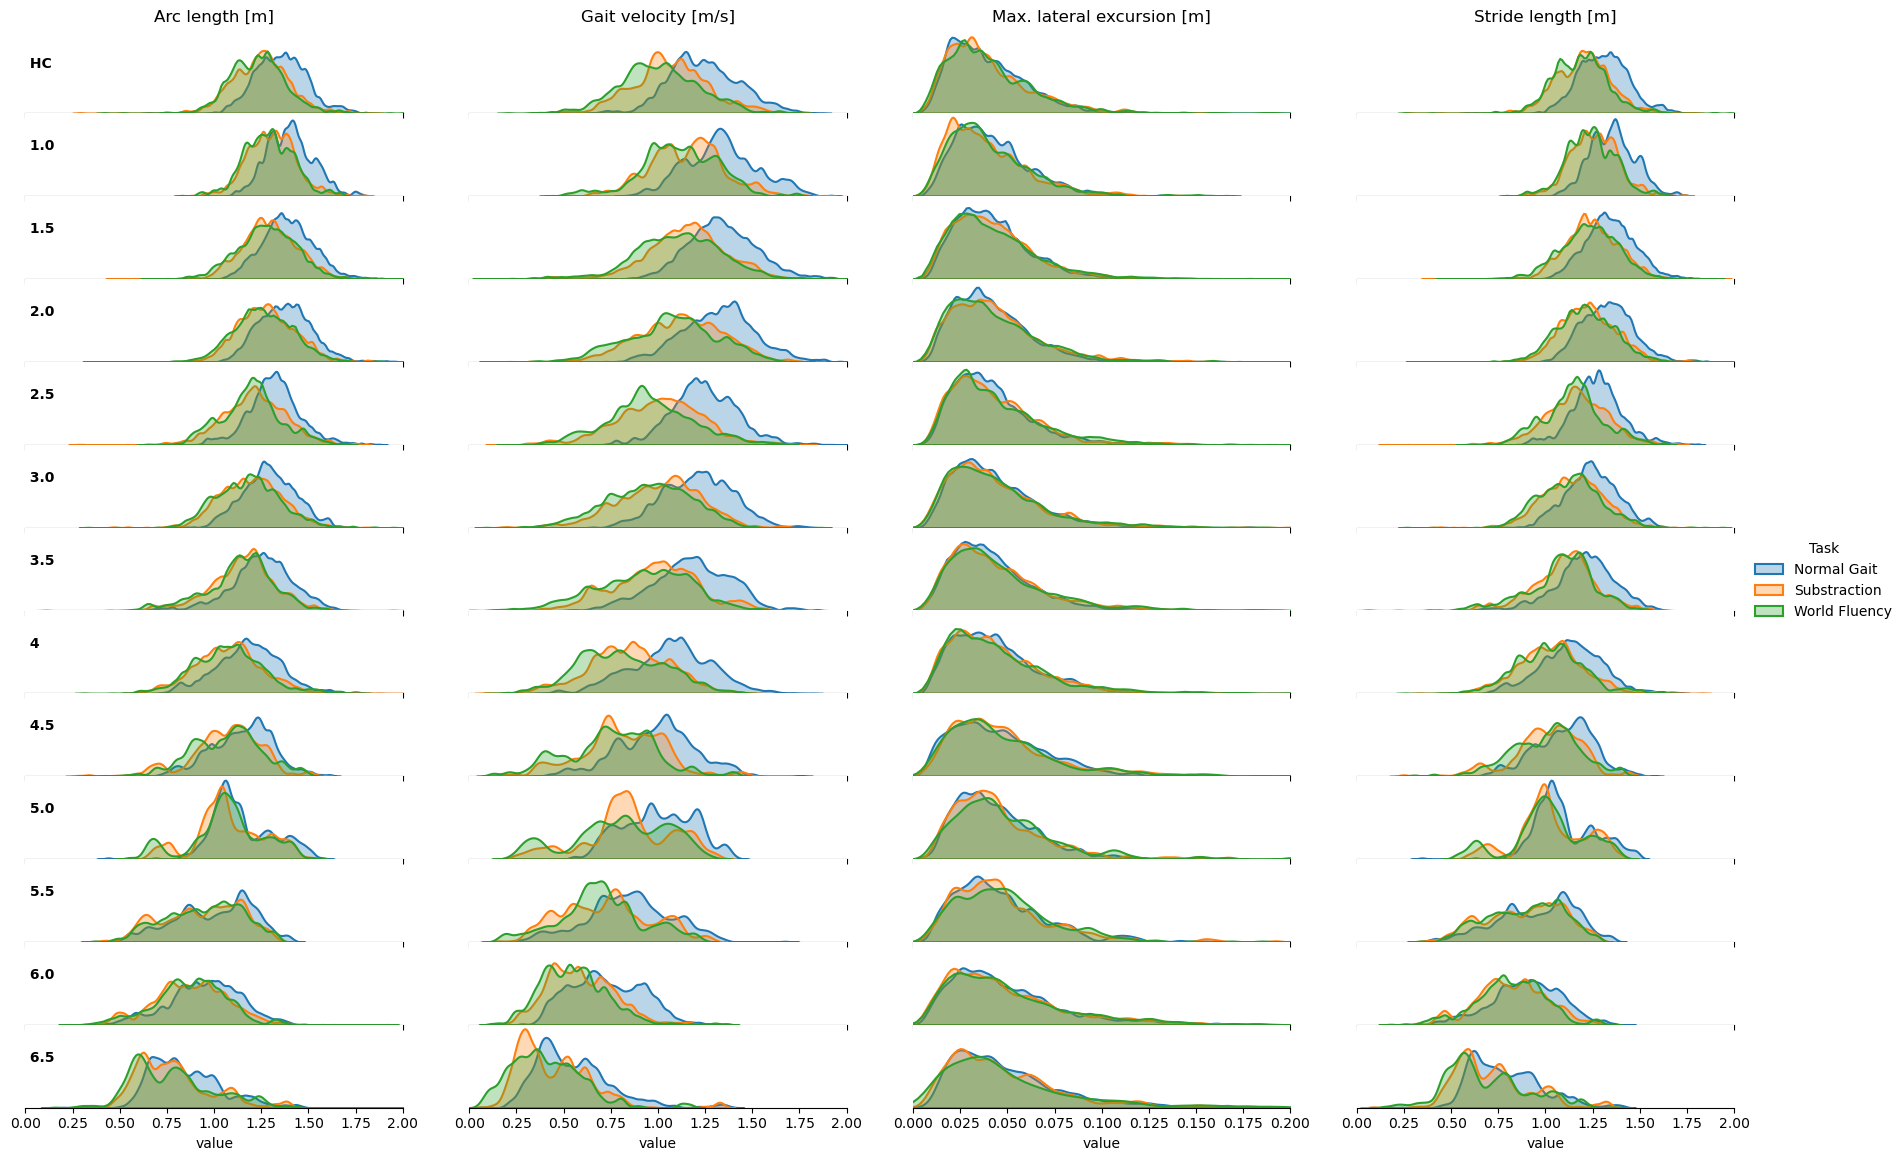

In [16]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=df_Spatial.drop([
    # 'arc length [m]', 'stride length [m]', 'gait velocity [m/s]', 'max. lateral excursion [m]',
    'heel strike angle [deg]', 'toe off angle [deg]', 'turning angle [deg]', 'max. sensor lift [m]',
                                     
], axis=1 ).melt([ #'stride time [s]', 
    'Foot', 'stride id', 'Trial', 'Participant','Task', 'EDSS', 'gs_id', 'Session']),
                  row="EDSS", col='variable', hue="Task", 
                  row_order =['HC',1.0,1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5.0, 5.5, 6.0, 6.5],
                  aspect=5, height=.9,
                  sharex="col", sharey="col",
                  
                  )
sns.kdeplot()
# Draw the densities in a few steps
g.map(sns.kdeplot, "value",
      bw_adjust=.4, clip_on=[0, 90], 
      fill=True, alpha=0.3, linewidth=1.5)
# g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None  to refline() uses the hue mapping
# g.refline(y=0, linewidth=1, linestyle="-", color='k', clip_on=False)


for i, iax in enumerate(g.axes):
    ax_text = iax[0].get_title().split('|')[0].split('=')[-1]
    iax[0].text(0, .6, ax_text, fontweight="bold",
            ha="left", va="center", transform=iax[0].transAxes)
    iax[0].set_xlim([0,2])
    iax[1].set_xlim([0,2])
    iax[2].set_xlim([0, 0.2])
    iax[3].set_xlim([0, 2])
    if i!= len(g.axes)-1:
        iax[0].spines['bottom'].set_visible(False)
        iax[1].spines['bottom'].set_visible(False)
        iax[2].spines['bottom'].set_visible(False)
        iax[3].spines['bottom'].set_visible(False)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.001)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(left=True)
g.axes[0, 0].set_title('Arc length [m]')
g.axes[0, 1].set_title('Gait velocity [m/s]')
g.axes[0, 2].set_title('Max. lateral excursion [m]')
g.axes[0, 3].set_title('Stride length [m]')
g.add_legend()

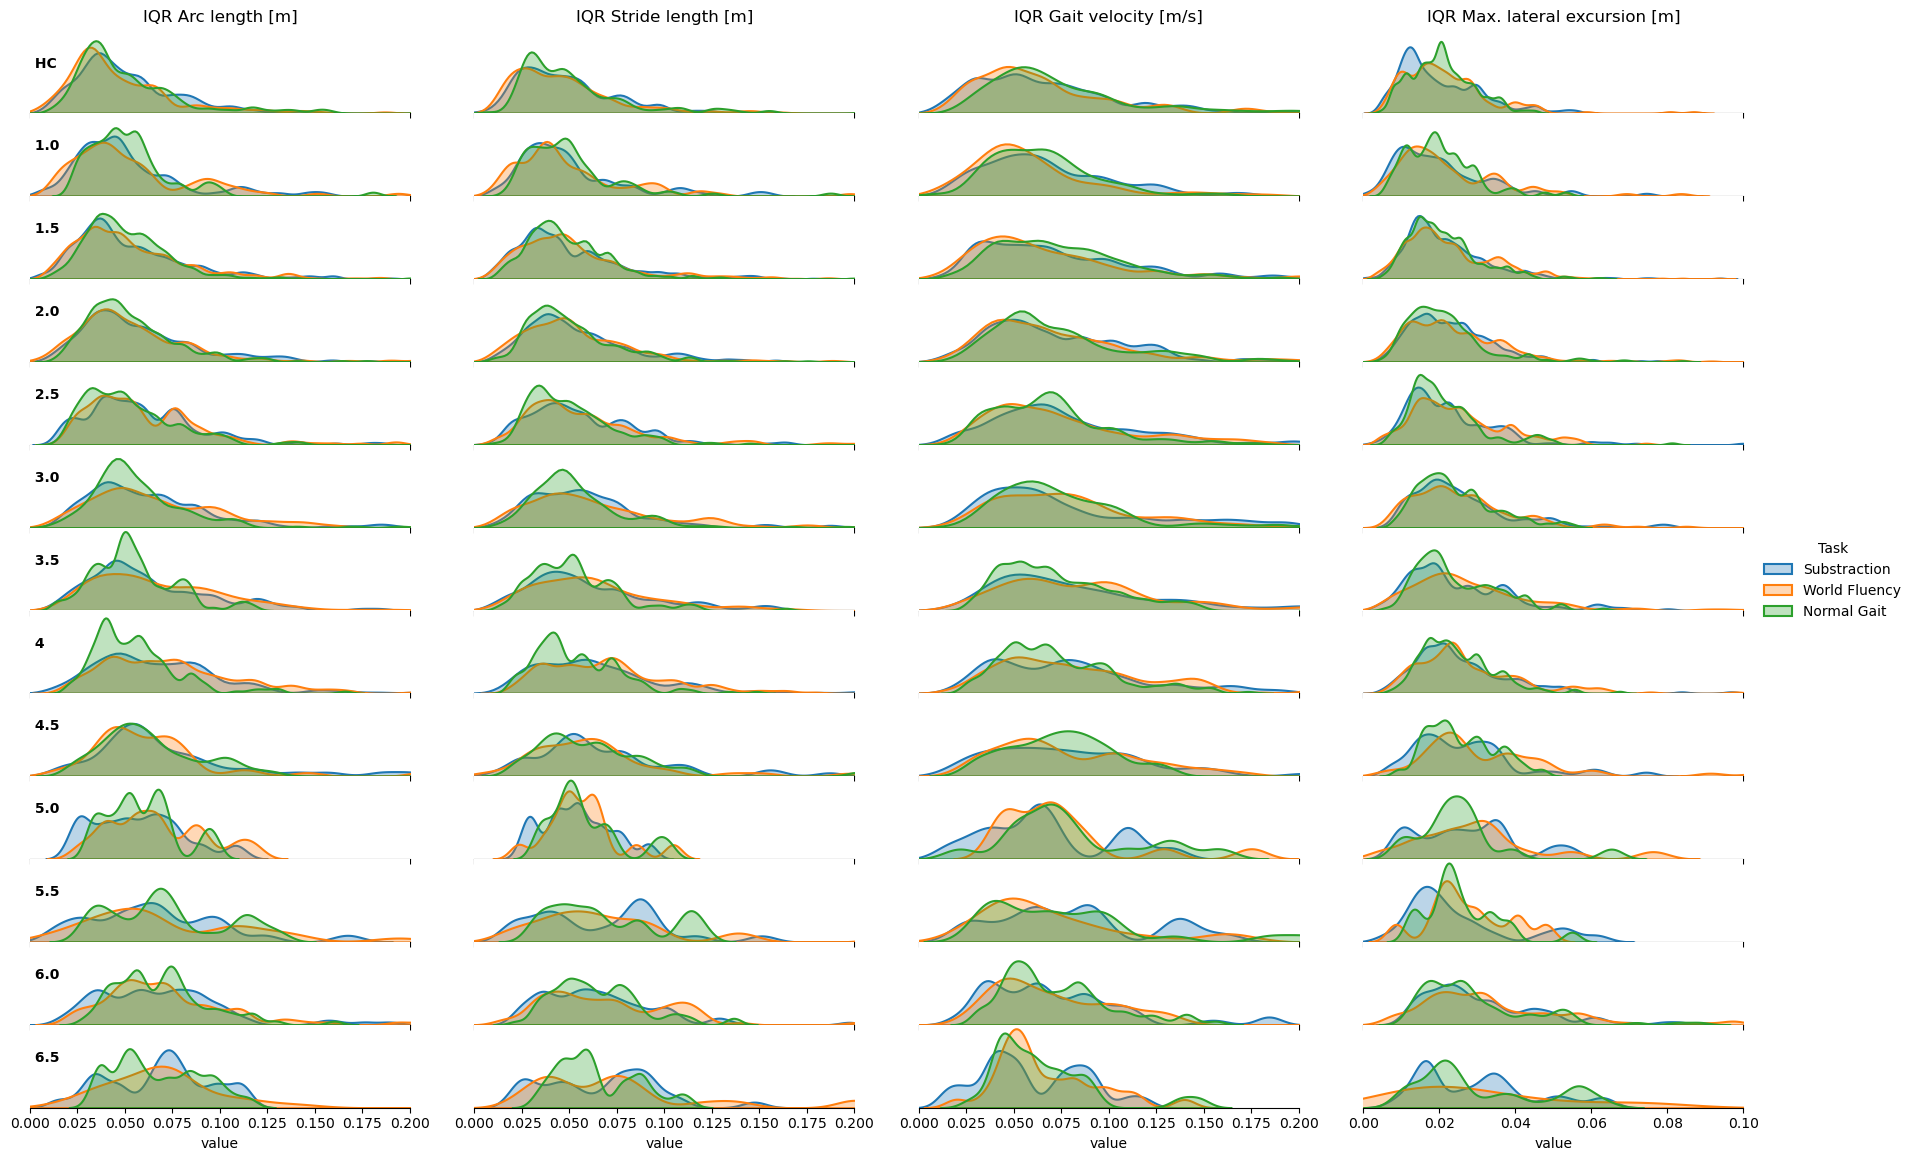

In [23]:
df_Spatial_iqr = pd.concat([df_Spatial.groupby(['Trial','Participant', 'Task', 'EDSS'])[x].agg(iqr).to_frame().reset_index(['Participant', 'Task', 'EDSS']) 
           for x in ['arc length [m]', 'stride length [m]', 'gait velocity [m/s]', 'max. lateral excursion [m]', 
                     'heel strike angle [deg]', 'toe off angle [deg]', 'turning angle [deg]', 'max. sensor lift [m]',]], axis=1).reset_index()
df_Spatial_iqr = df_Spatial_iqr.loc[:,~df_Spatial_iqr.columns.duplicated()]
df_Spatial_iqr.head(2)
g = sns.FacetGrid(data=df_Spatial_iqr.drop([
    # 'arc length [m]', 'stride length [m]', 'gait velocity [m/s]', 'max. lateral excursion [m]',
    'heel strike angle [deg]', 'toe off angle [deg]', 'turning angle [deg]', 'max. sensor lift [m]',
                                     
], axis=1 ).melt([ #'stride time [s]', 
     'Trial', 'Participant','Task', 'EDSS', ]),
                  row="EDSS", col='variable', hue="Task", 
                  row_order =['HC',1.0,1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5.0, 5.5, 6.0, 6.5],
                  aspect=5, height=.9,
                  sharex="col", sharey="col",
                  
                  )
sns.kdeplot()
# Draw the densities in a few steps
g.map(sns.kdeplot, "value",
      bw_adjust=.4, clip_on=[0, 90], 
      fill=True, alpha=0.3, linewidth=1.5)
# g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=1, linestyle="-", color='k', clip_on=False)


for i, iax in enumerate(g.axes):
    ax_text = iax[0].get_title().split('|')[0].split('=')[-1]
    iax[0].text(0, .6, ax_text, fontweight="bold",
            ha="left", va="center", transform=iax[0].transAxes)
    iax[0].set_xlim([0, 0.2])
    iax[1].set_xlim([0, 0.2])
    iax[2].set_xlim([0, 0.2])
    iax[3].set_xlim([0, 0.1])
    # iax[0].axvline(0, c='k', alpha=0.6)
    # iax[2].set_xlim([50, 90])
    if i!= len(g.axes)-1:
        iax[0].spines['bottom'].set_visible(False)
        iax[1].spines['bottom'].set_visible(False)
        # iax[2].spines['bottom'].set_visible(False)

# # Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.001)

# # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(left=True)
g.axes[0, 0].set_title('IQR Arc length [m]')
g.axes[0, 2].set_title('IQR Gait velocity [m/s]')
g.axes[0, 3].set_title('IQR Max. lateral excursion [m]')
g.axes[0, 1].set_title('IQR Stride length [m]')
g.add_legend()

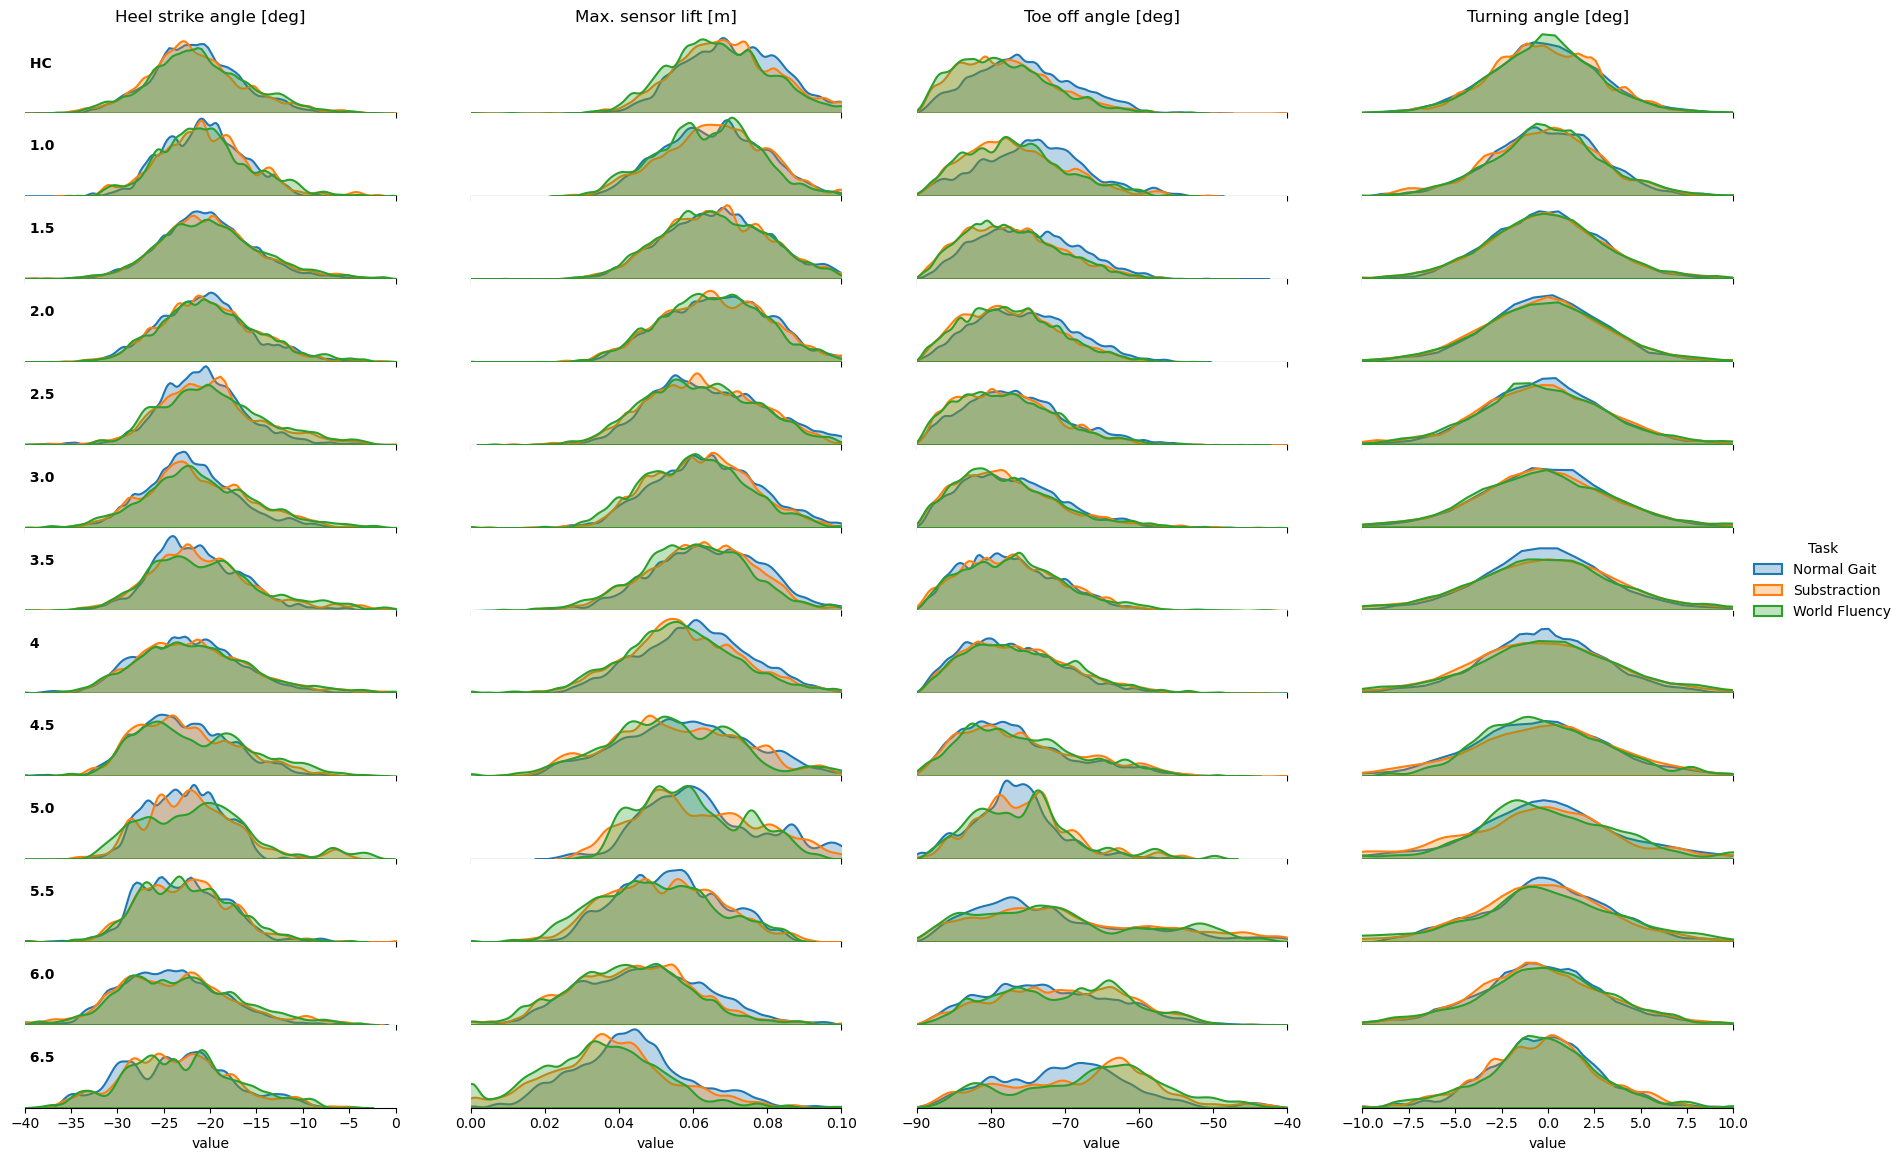

In [21]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=df_Spatial.drop([
    'arc length [m]', 'stride length [m]', 'gait velocity [m/s]', 'max. lateral excursion [m]',
    # 'heel strike angle [deg]', 'toe off angle [deg]', 'turning angle [deg]', 'max. sensor lift [m]',
                                     
], axis=1 ).melt([ #'stride time [s]', 
    'Foot', 'stride id', 'Trial', 'Participant','Task', 'EDSS', 'gs_id', 'Session']),
                  row="EDSS", col='variable', hue="Task", 
                  row_order =['HC',1.0,1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5.0, 5.5, 6.0, 6.5],
                  aspect=5, height=.9,
                  sharex="col", sharey="col",
                  
                  )
sns.kdeplot()
# Draw the densities in a few steps
g.map(sns.kdeplot, "value",
      bw_adjust=.4, clip_on=[0, 90], 
      fill=True, alpha=0.3, linewidth=1.5)
# g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None  to refline() uses the hue mapping
# g.refline(y=0, linewidth=1, linestyle="-", color='k', clip_on=False)


for i, iax in enumerate(g.axes):
    ax_text = iax[0].get_title().split('|')[0].split('=')[-1]
    iax[0].text(0, .6, ax_text, fontweight="bold",
            ha="left", va="center", transform=iax[0].transAxes)
    iax[0].set_xlim([-40,0])
    iax[1].set_xlim([0,0.1])
    iax[2].set_xlim([-90, -40])
    iax[3].set_xlim([-10, 10])
    if i!= len(g.axes)-1:
        iax[0].spines['bottom'].set_visible(False)
        iax[1].spines['bottom'].set_visible(False)
        iax[2].spines['bottom'].set_visible(False)
        iax[3].spines['bottom'].set_visible(False)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.001)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(left=True)
g.axes[0, 0].set_title('Heel strike angle [deg]')
g.axes[0, 1].set_title('Max. sensor lift [m]')
g.axes[0, 2].set_title('Toe off angle [deg]')
g.axes[0, 3].set_title('Turning angle [deg]')
g.add_legend()

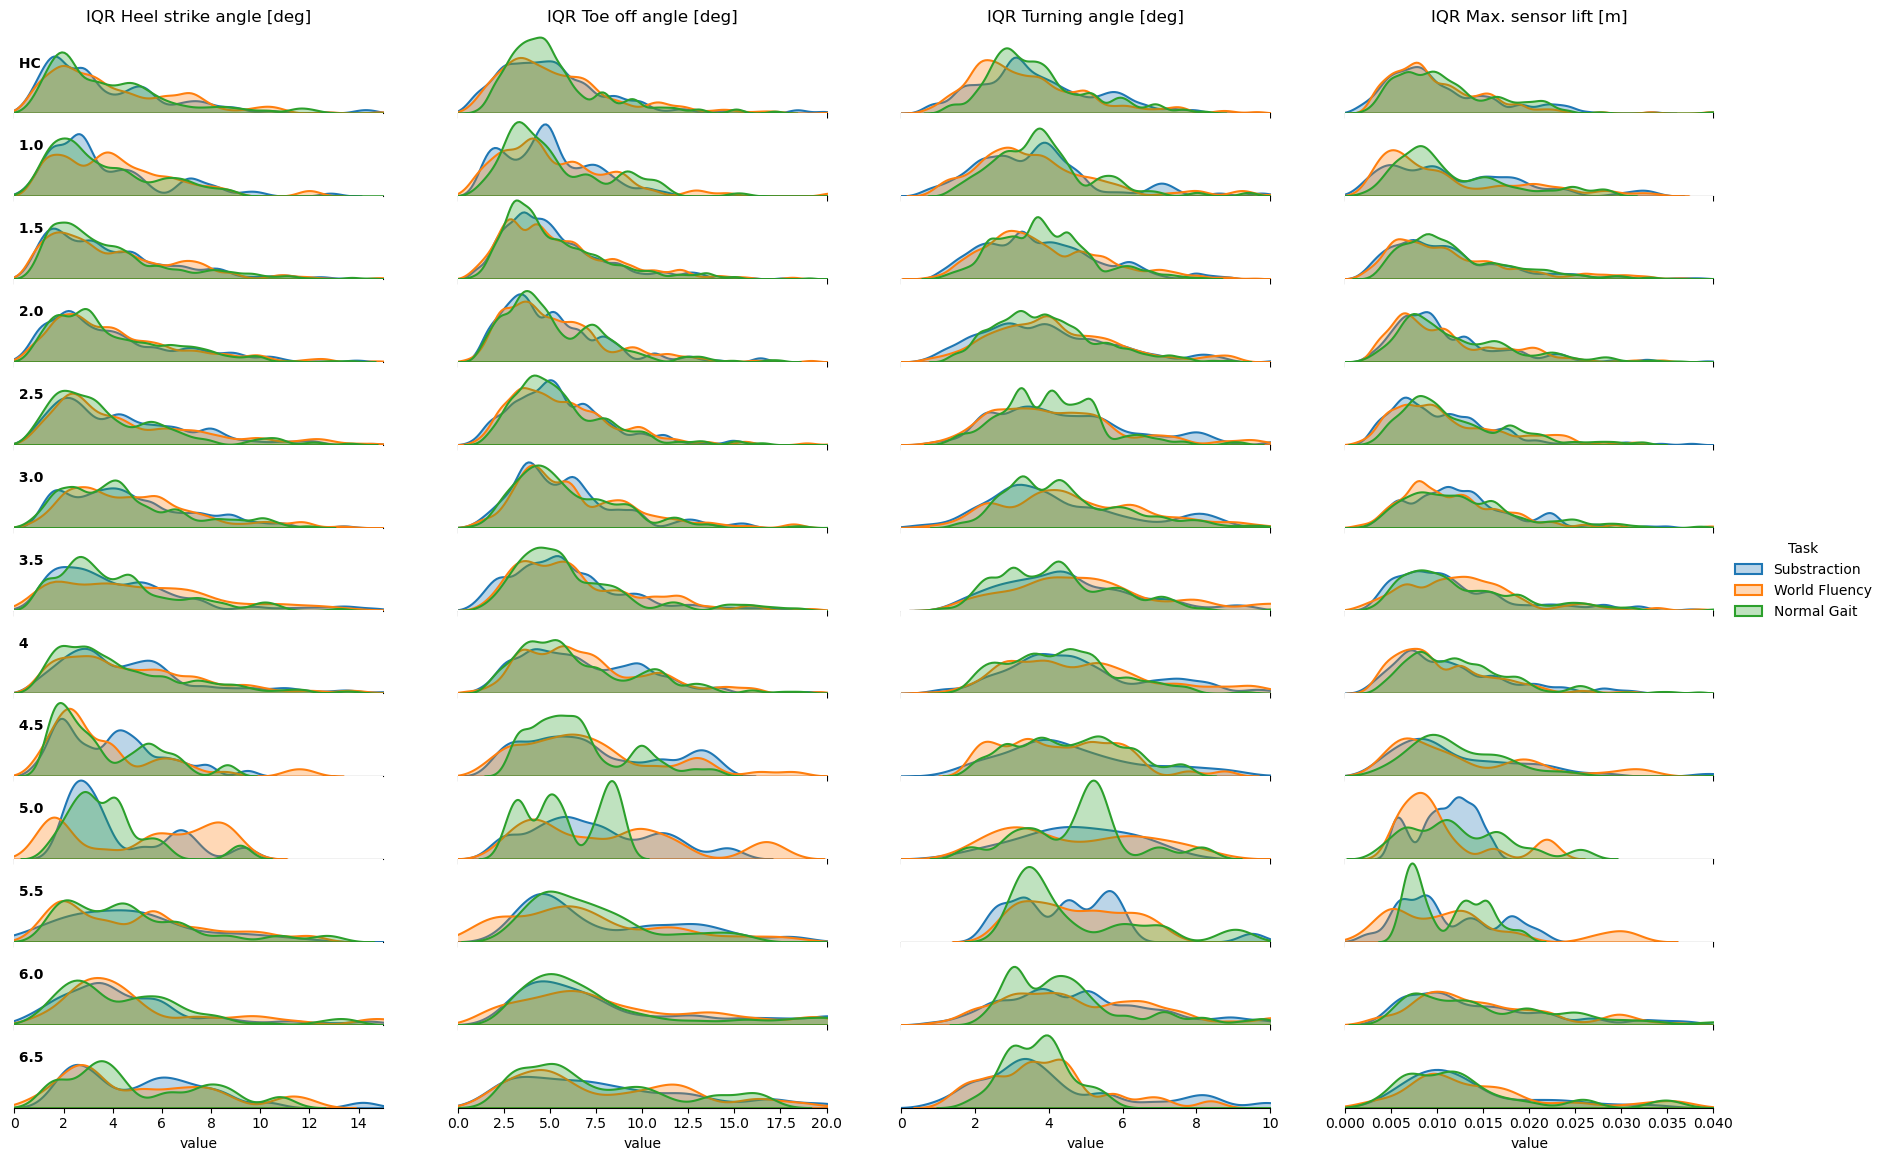

In [25]:
g = sns.FacetGrid(data=df_Spatial_iqr.drop([
    'arc length [m]', 'stride length [m]', 'gait velocity [m/s]', 'max. lateral excursion [m]',
    # 'heel strike angle [deg]', 'toe off angle [deg]', 'turning angle [deg]', 'max. sensor lift [m]',
                                     
], axis=1 ).melt([ #'stride time [s]', 
     'Trial', 'Participant','Task', 'EDSS', ]),
                  row="EDSS", col='variable', hue="Task", 
                  row_order =['HC',1.0,1.5, 2.0, 2.5, 3.0, 3.5, 4, 4.5, 5.0, 5.5, 6.0, 6.5],
                  aspect=5, height=.9,
                  sharex="col", sharey="col",
                  
                  )
sns.kdeplot()
# Draw the densities in a few steps
g.map(sns.kdeplot, "value",
      bw_adjust=.4, clip_on=[0, 90], 
      fill=True, alpha=0.3, linewidth=1.5)
# g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=1, linestyle="-", color='k', clip_on=False)


for i, iax in enumerate(g.axes):
    ax_text = iax[0].get_title().split('|')[0].split('=')[-1]
    iax[0].text(0, .6, ax_text, fontweight="bold",
            ha="left", va="center", transform=iax[0].transAxes)
    iax[0].set_xlim([0, 15])
    iax[1].set_xlim([0, 20])
    iax[2].set_xlim([0, 10])
    iax[3].set_xlim([0, 0.04])
    # iax[0].axvline(0, c='k', alpha=0.6)
    # iax[2].set_xlim([50, 90])
    if i!= len(g.axes)-1:
        iax[0].spines['bottom'].set_visible(False)
        iax[1].spines['bottom'].set_visible(False)
        # iax[2].spines['bottom'].set_visible(False)

# # Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.001)

# # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(left=True)
g.axes[0, 0].set_title('IQR Heel strike angle [deg]')
g.axes[0, 3].set_title('IQR Max. sensor lift [m]')
g.axes[0, 1].set_title('IQR Toe off angle [deg]')
g.axes[0, 2].set_title('IQR Turning angle [deg]')
g.add_legend()

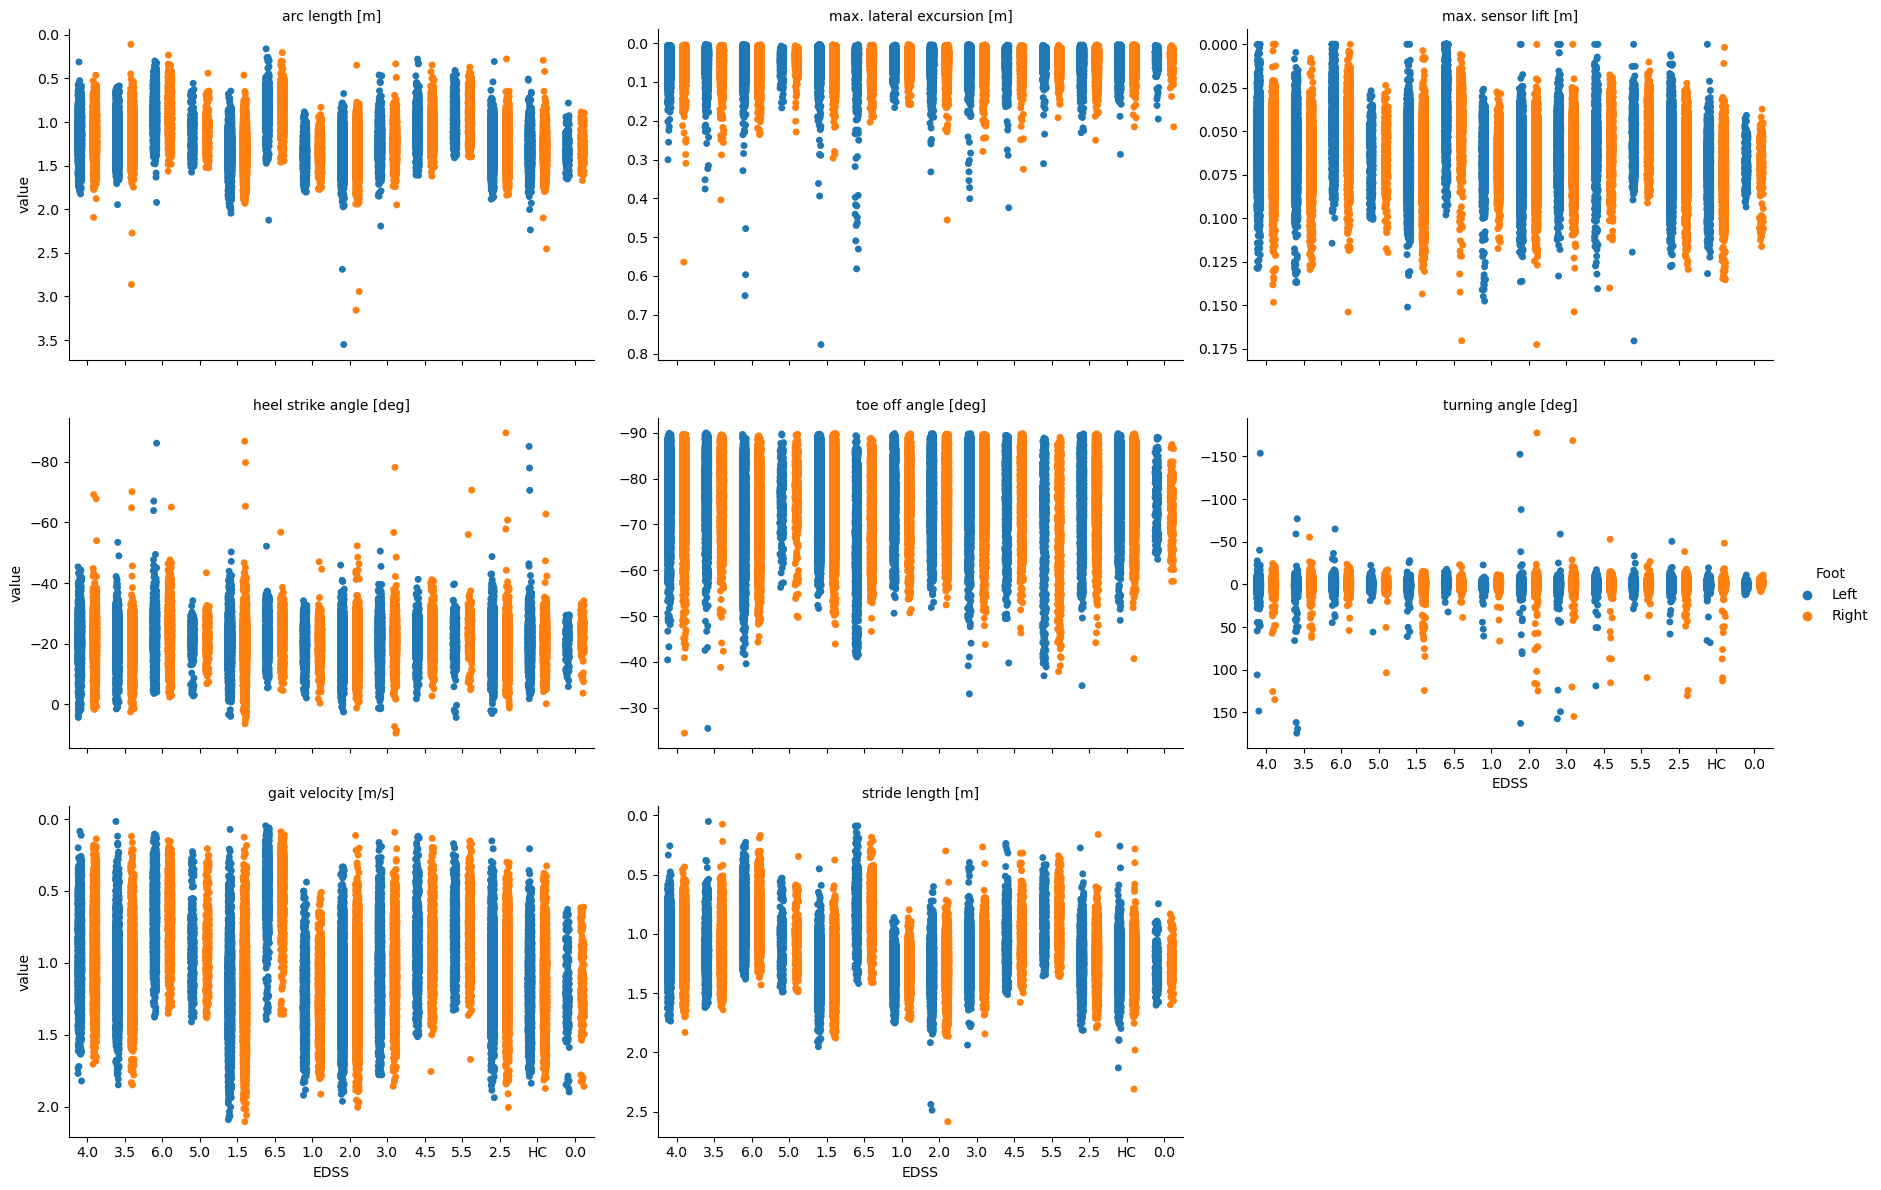

In [11]:
df_spatial_plot = df_Spatial.melt(['Foot', 'stride id', 'Trial', 'EDSS'])
# df_spatial_plot = df_spatial_plot[df_spatial_plot.Trial == 'Spatial_20210430-083735_Walk']     
# df_spatial_plot['stride id'] = [str(i) for i in df_spatial_plot['stride id']]
gs = sns.catplot(data=df_spatial_plot, x="EDSS", y="value", 
                 hue="Foot", kind="strip", col='variable', sharey=False, col_wrap=3, 
                 col_order=['arc length [m]', 'max. lateral excursion [m]',  'max. sensor lift [m]',
                            'heel strike angle [deg]', 'toe off angle [deg]', 'turning angle [deg]',
                            'gait velocity [m/s]', 'stride length [m]'],
                 margin_titles=True,height=4, aspect=1.5, dodge=True,
                 # width=0.3
                )
# gs.set(ylabel="Duration [s]")
gs.set_titles(col_template= "{col_name}")

# Upper body angles

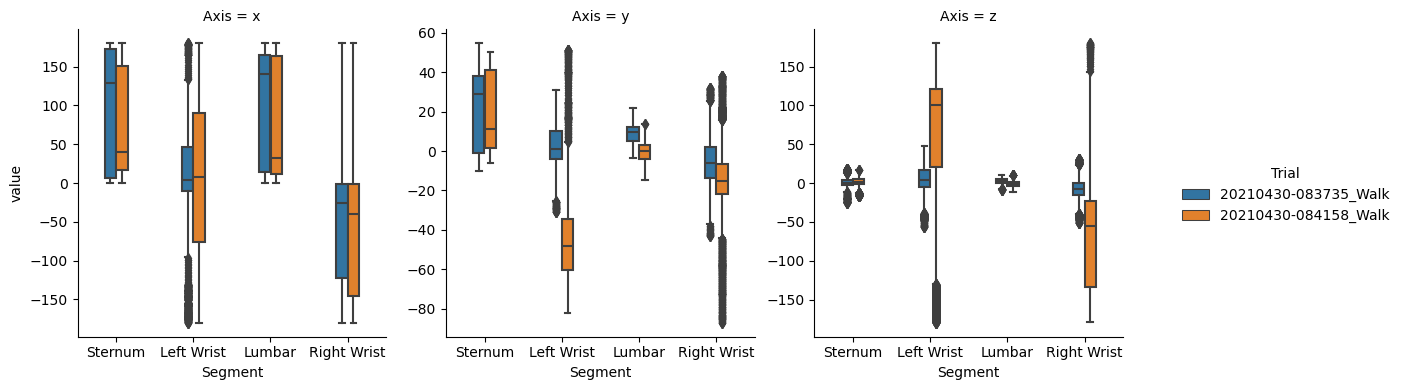

In [98]:
Orientation_data = [ifile for ifile in (Path(project_path)).glob("*.csv") if ifile.stem.startswith('Angle')]
df= pd.concat([pd.read_csv(ifile, sep='\t').assign(Trial=ifile.stem[6:]) for ifile in Orientation_data], ignore_index=True)

df['Sternum/Angle_x'] = df['Sternum/Angle_x'].abs()
df['Lumbar/Angle_x'] = df['Lumbar/Angle_x'].abs()

data = df.melt(['time', 'Trial'])
data['Segment'] = [i.split('/')[0] for i in data.variable]
data['Axis'] = [i.split('/')[1][-1] for i in data.variable]
data.head()
go = sns.catplot(data=data, x="Segment", y="value", 
                 hue="Trial", kind="box",  sharey=False, col='Axis', 
                 margin_titles=True,height=4, aspect=1, 
                 width=0.3
                )

In [110]:
Stride_bounds = pd.DataFrame(columns=['Trial', 'Foot', 'Stride Id', 'Start', 'End'])
for ifile in (Path(project_path)).glob("*.npy"):
    if ifile.stem.startswith('StrideBound'):
        file = np.load(ifile,allow_pickle='TRUE').item()
        stride_file = pd.concat([pd.DataFrame(file[foot], columns=[ 'Start', 'End']).assign(Foot=foot.split(' ')[0]).assign(Trial=ifile.stem[12:]).reset_index()
                                 for foot in ['Left Foot', 'Right Foot']], ignore_index=True)
        stride_file.rename(columns={'index': 'Stride Id'}, inplace=True)     
        Stride_bounds = pd.concat([Stride_bounds, stride_file], ignore_index=True)
Stride_bounds.head()

Trial  Foot Stride Id Start   End
0  20210430-083735_Walk  Left         0   590   718
1  20210430-083735_Walk  Left         1   725   845
2  20210430-083735_Walk  Left         2   852   972
3  20210430-083735_Walk  Left         3   979  1098
4  20210430-083735_Walk  Left         4  1104  1228

In [113]:
# df['Sternum/Angle_x'].abs().plot()
df.head()


time  Sternum/Angle_x  Sternum/Angle_y  Sternum/Angle_z  \
0  0.000000        12.187051        -2.930318        -3.584443   
1  0.007812        11.990749        -3.002854        -3.489092   
2  0.015625        11.793454        -3.071656        -3.391510   
3  0.023438        11.595163        -3.138034        -3.291304   
4  0.031250        11.397844        -3.200796        -3.188392   

   Left Wrist/Angle_x  Left Wrist/Angle_y  Left Wrist/Angle_z  Lumbar/Angle_x  \
0           12.939945            1.069170           -0.558068        2.923848   
1           12.744458            0.995549           -0.659351        2.805544   
2           12.549719            0.922595           -0.751861        2.683538   
3           12.354793            0.850436           -0.834581        2.558009   
4           12.159365            0.778417           -0.907675        2.428289   

   Lumbar/Angle_y  Lumbar/Angle_z  Right Wrist/Angle_x  Right Wrist/Angle_y  \
0        1.274990       -0.293840            -8.763132             1.926370   
1        1.291597       -0.288836            -8.583183             1.906202   
2        1.311571       -0.283980            -8.402007             1.888810   
3        1.332107       -0.279204            -8.220399             1.872844   
4        1.351071       -0.274923            -8.038870             1.857851   

   Right Wrist/Angle_z                 Trial  
0            -2.271628  20210430-083735_Walk  
1            -2.243893  20210430-083735_Walk  
2            -2.214011  20210430-083735_Walk  
3            -2.180813  20210430-083735_Walk  
4            -2.143674  20210430-083735_Walk

C:\Users\Nassila\AppData\Local\Temp\ipykernel_14632\3460872897.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_by_stride = pd.concat([df_by_stride,
C:\Users\Nassila\miniconda3\envs\knee_tactile_auditory\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nassila\miniconda3\envs\knee_tactile_auditory\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\

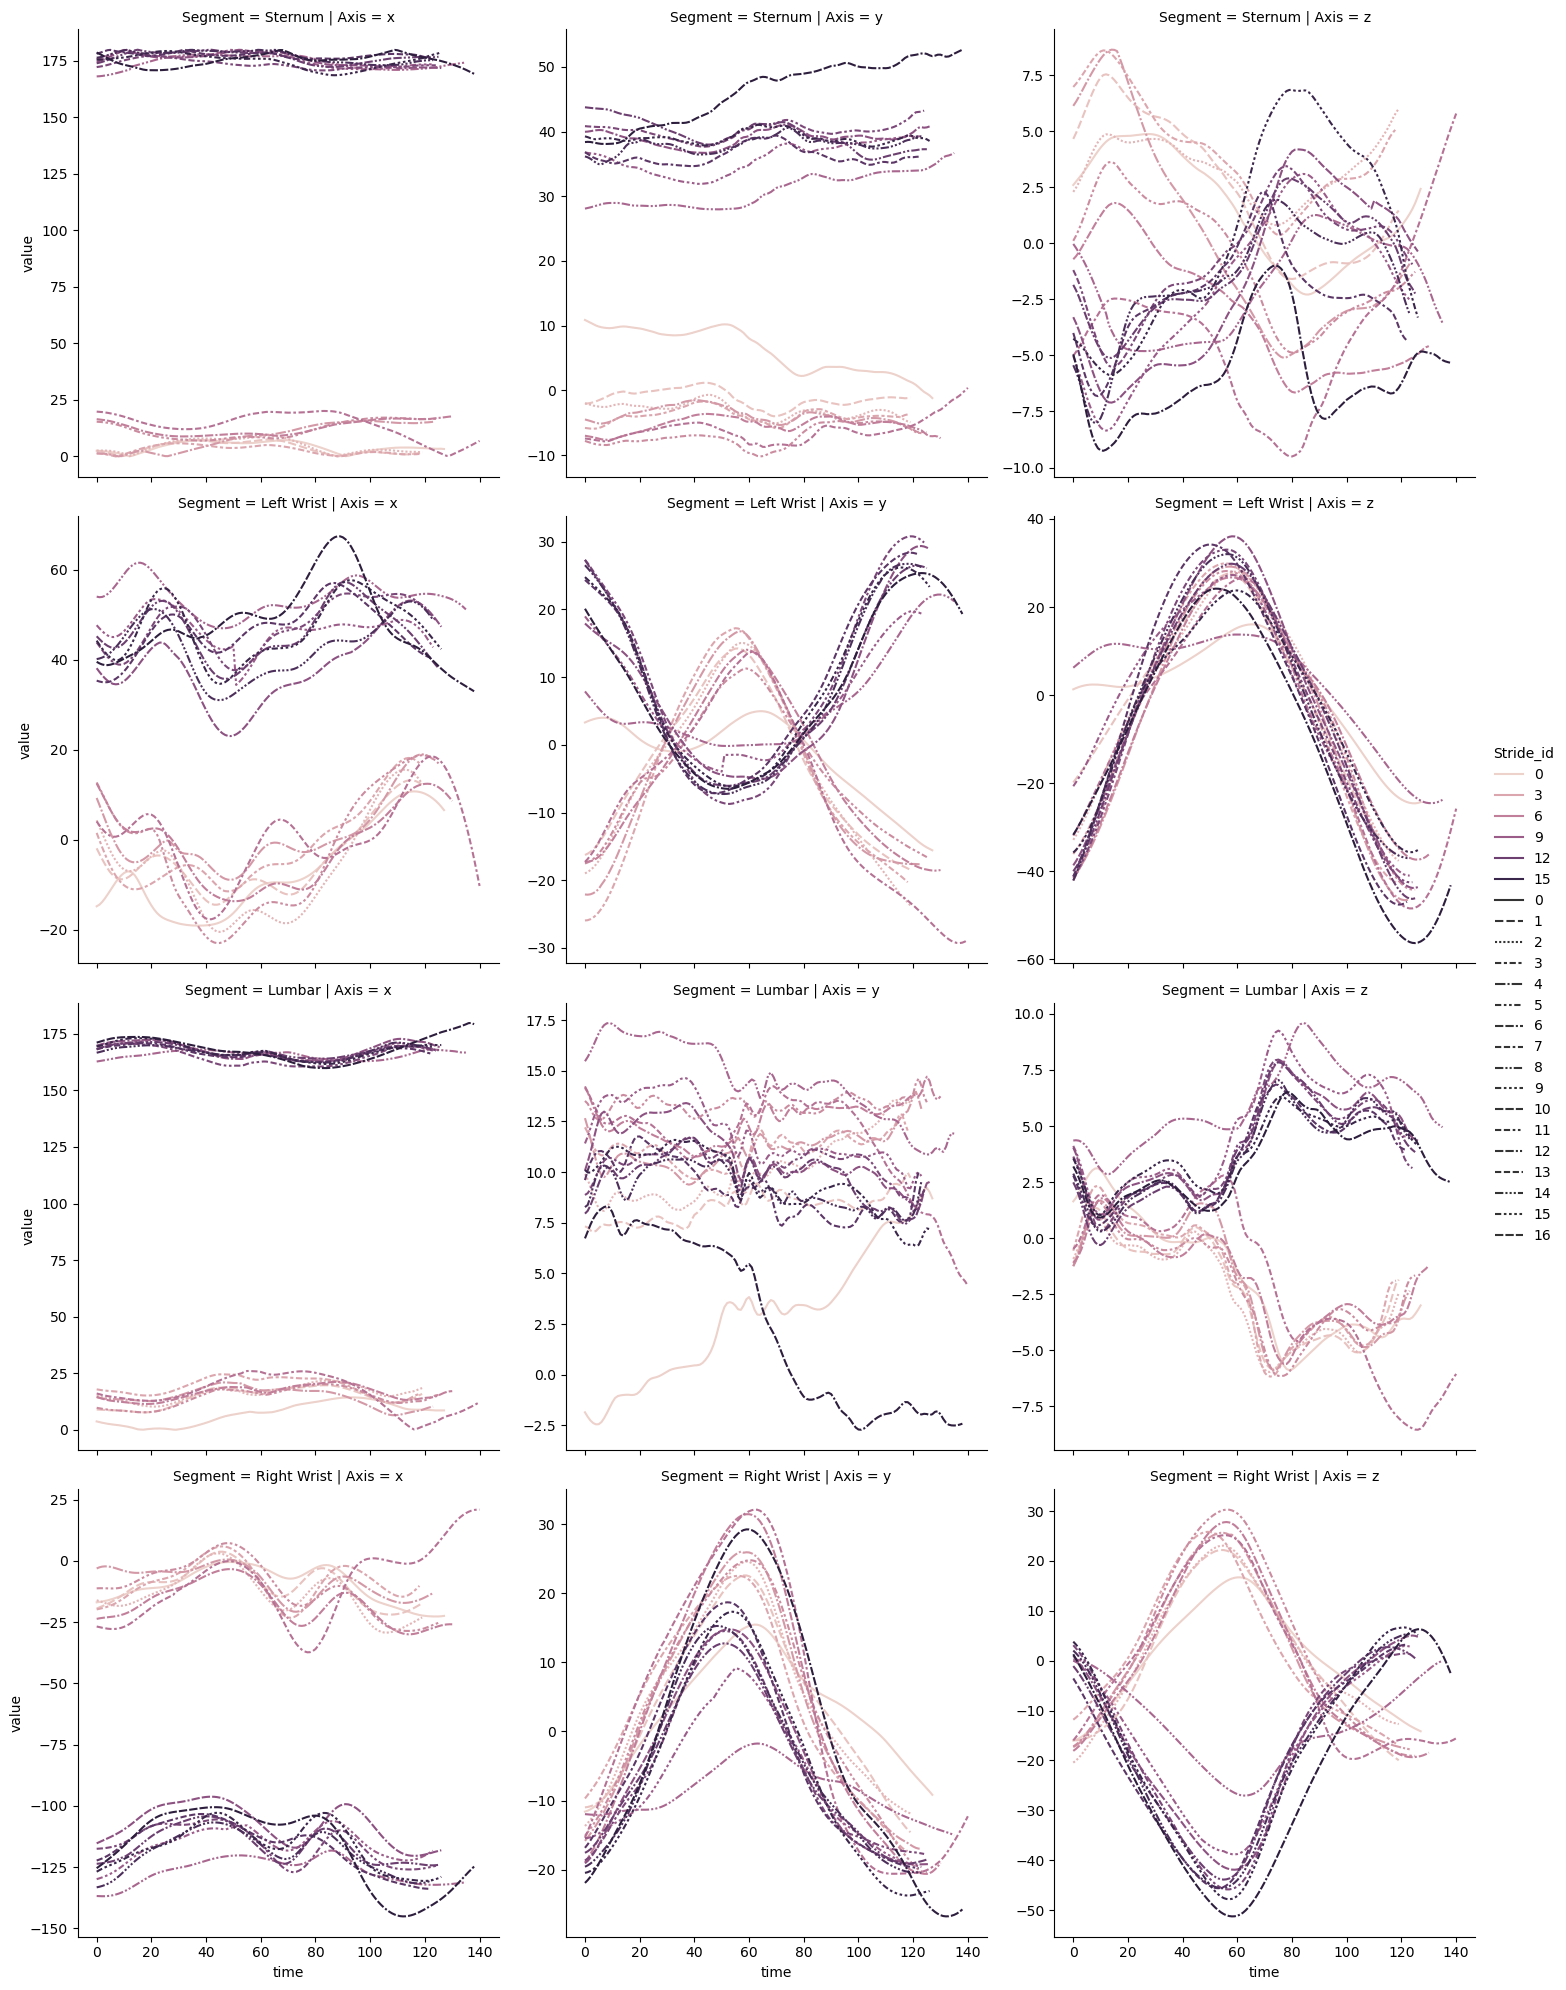

In [151]:
stride_bound_L = Stride_bounds[Stride_bounds.Foot=='Left']
new_col = list(df.columns)+['Stride_id']
df_by_stride = pd.DataFrame(columns=new_col)
for index, row in stride_bound_L.iterrows():
    itrial = row.Trial
    df_by_stride = pd.concat([df_by_stride, 
                              df[df.Trial==itrial][row.Start:row.End].assign(Stride_id=int(row['Stride Id'])).reset_index(drop=True).drop('time', axis=1).reset_index().rename(columns={'index':'time'})])

data_stride=df_by_stride.melt(['Trial', 'Stride_id', 'time'])
data_stride = data_stride[data_stride.Trial== '20210430-083735_Walk']
data_stride['Segment'] = [i.split('/')[0] for i in data_stride.variable]
data_stride['Axis'] = [i.split('/')[1][-1] for i in data_stride.variable]
data_stride.head()
grot_stride = sns.relplot(data=data_stride, x='time', y='value', style='Stride_id', row='Segment', col='Axis', kind='line', hue='Stride_id', facet_kws={'sharey': False, 'sharex': True})

In [117]:
df.columns

Index(['time', 'Sternum/Angle_x', 'Sternum/Angle_y', 'Sternum/Angle_z',
       'Left Wrist/Angle_x', 'Left Wrist/Angle_y', 'Left Wrist/Angle_z',
       'Lumbar/Angle_x', 'Lumbar/Angle_y', 'Lumbar/Angle_z',
       'Right Wrist/Angle_x', 'Right Wrist/Angle_y', 'Right Wrist/Angle_z',
       'Trial'],
      dtype='object')